In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/higgs-boson/training.zip
/kaggle/input/higgs-boson/HiggsBosonCompetition_AMSMetric_rev1.py
/kaggle/input/higgs-boson/random_submission.zip
/kaggle/input/higgs-boson/test.zip


In [2]:
!unzip /kaggle/input/higgs-boson/training.zip

Archive:  /kaggle/input/higgs-boson/training.zip
  inflating: training.csv            


In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv("/kaggle/working/training.csv")

df.shape

(250000, 33)

In [5]:
df.head(3)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [7]:
## Dropping the EventID column

df.drop(columns=["EventId"], axis=1, inplace=True)

df.shape

(250000, 32)

In [8]:
df.head(3)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DER_mass_MMC,250000.0,-49.023079,406.345647,-999.000000,78.100750,105.012000,130.606250,1192.026000
DER_mass_transverse_met_lep,250000.0,49.239819,35.344886,0.000000,19.241000,46.524000,73.598000,690.075000
DER_mass_vis,250000.0,81.181982,40.828691,6.329000,59.388750,73.752000,92.259000,1349.351000
DER_pt_h,250000.0,57.895962,63.655682,0.000000,14.068750,38.467500,79.169000,2834.999000
DER_deltaeta_jet_jet,250000.0,-708.420675,454.480565,-999.000000,-999.000000,-999.000000,0.490000,8.503000
DER_mass_jet_jet,250000.0,-601.237051,657.972302,-999.000000,-999.000000,-999.000000,83.446000,4974.979000
DER_prodeta_jet_jet,250000.0,-709.356603,453.019877,-999.000000,-999.000000,-999.000000,-4.593000,16.690000
DER_deltar_tau_lep,250000.0,2.373100,0.782911,0.208000,1.810000,2.491500,2.961000,5.684000
DER_pt_tot,250000.0,18.917332,22.273494,0.000000,2.841000,12.315500,27.591000,2834.999000
DER_sum_pt,250000.0,158.432217,115.706115,46.104000,77.550000,120.664500,200.478250,1852.462000


In [10]:
## Checking for missing values

df.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
Weight    

There are no missing values 

In [11]:
df["Label"].value_counts()

Label
b    164333
s     85667
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

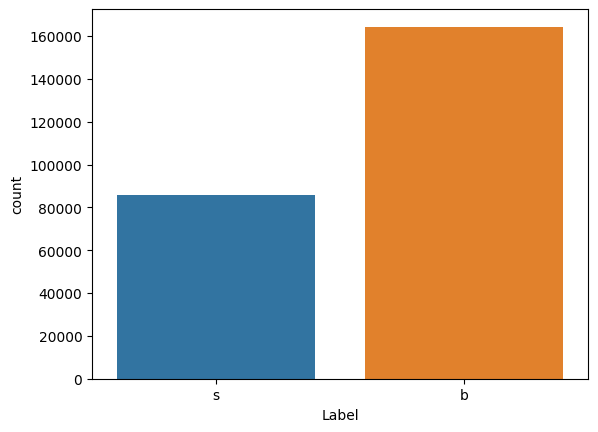

In [12]:
sns.countplot(x=df["Label"], data=df)

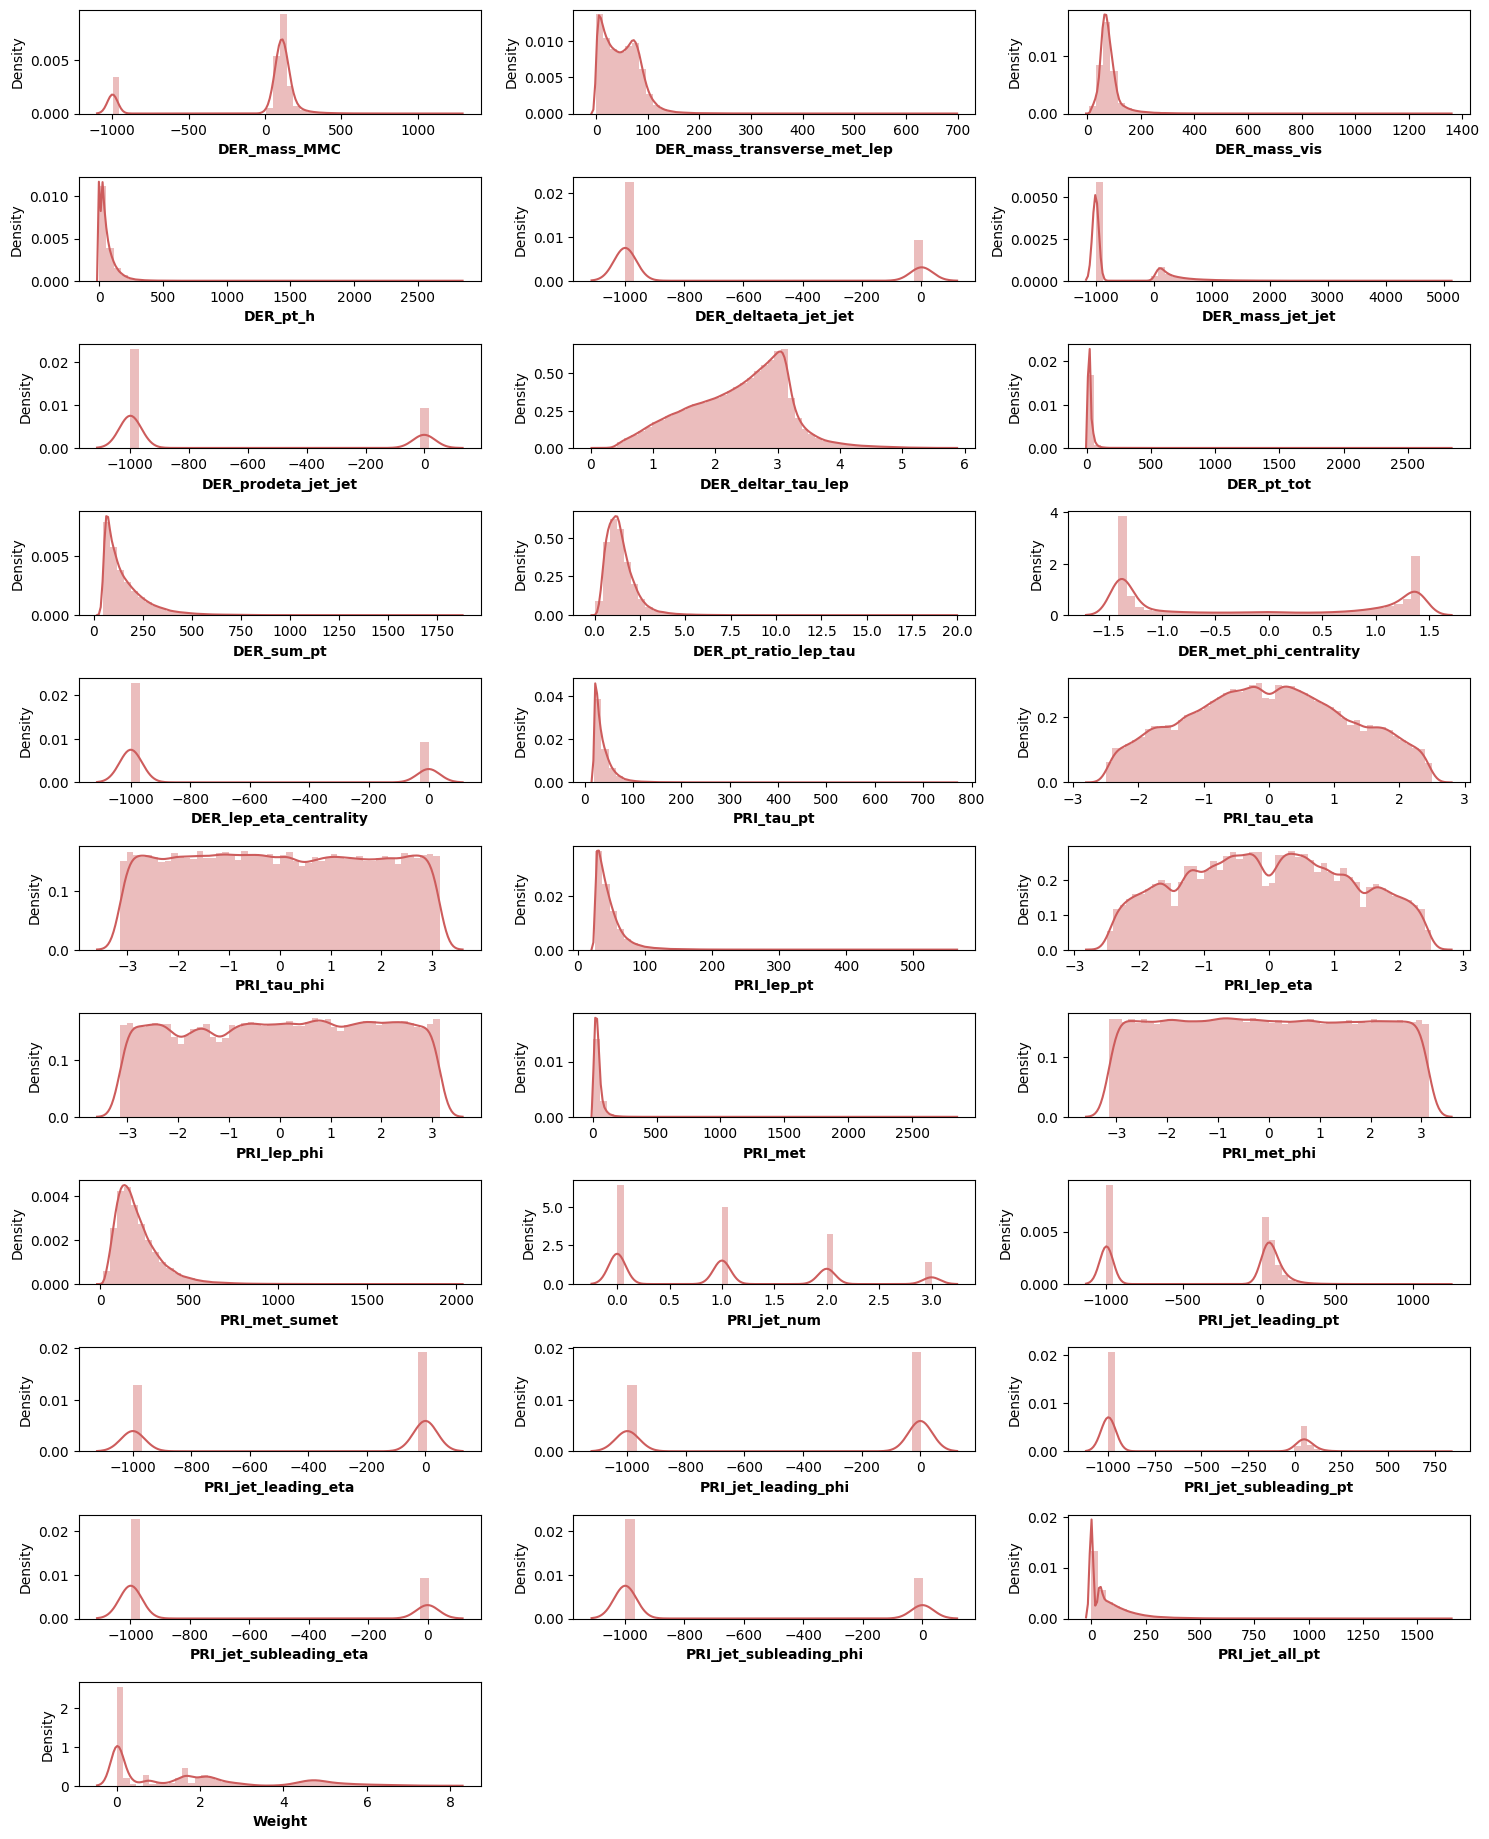

In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [14]:
## Checking duplicate records
df.duplicated().sum()

0

## Data Preprocessing

In [15]:
def check_multicollinearity(df, threshold=0.7):
    df = pd.DataFrame(df)  # Convert dataset to a DataFrame if needed
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]
    corr_matrix = df_numeric.corr().abs()  # Calculate the correlation matrix
    cols = corr_matrix.columns
    multicollinear_features = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if corr_matrix.iloc[i, j] >= threshold:
                multicollinear_features.add(cols[i])
                multicollinear_features.add(cols[j])

    # Plotting the correlation heatmap
    plt.figure(figsize=(15,12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    return multicollinear_features

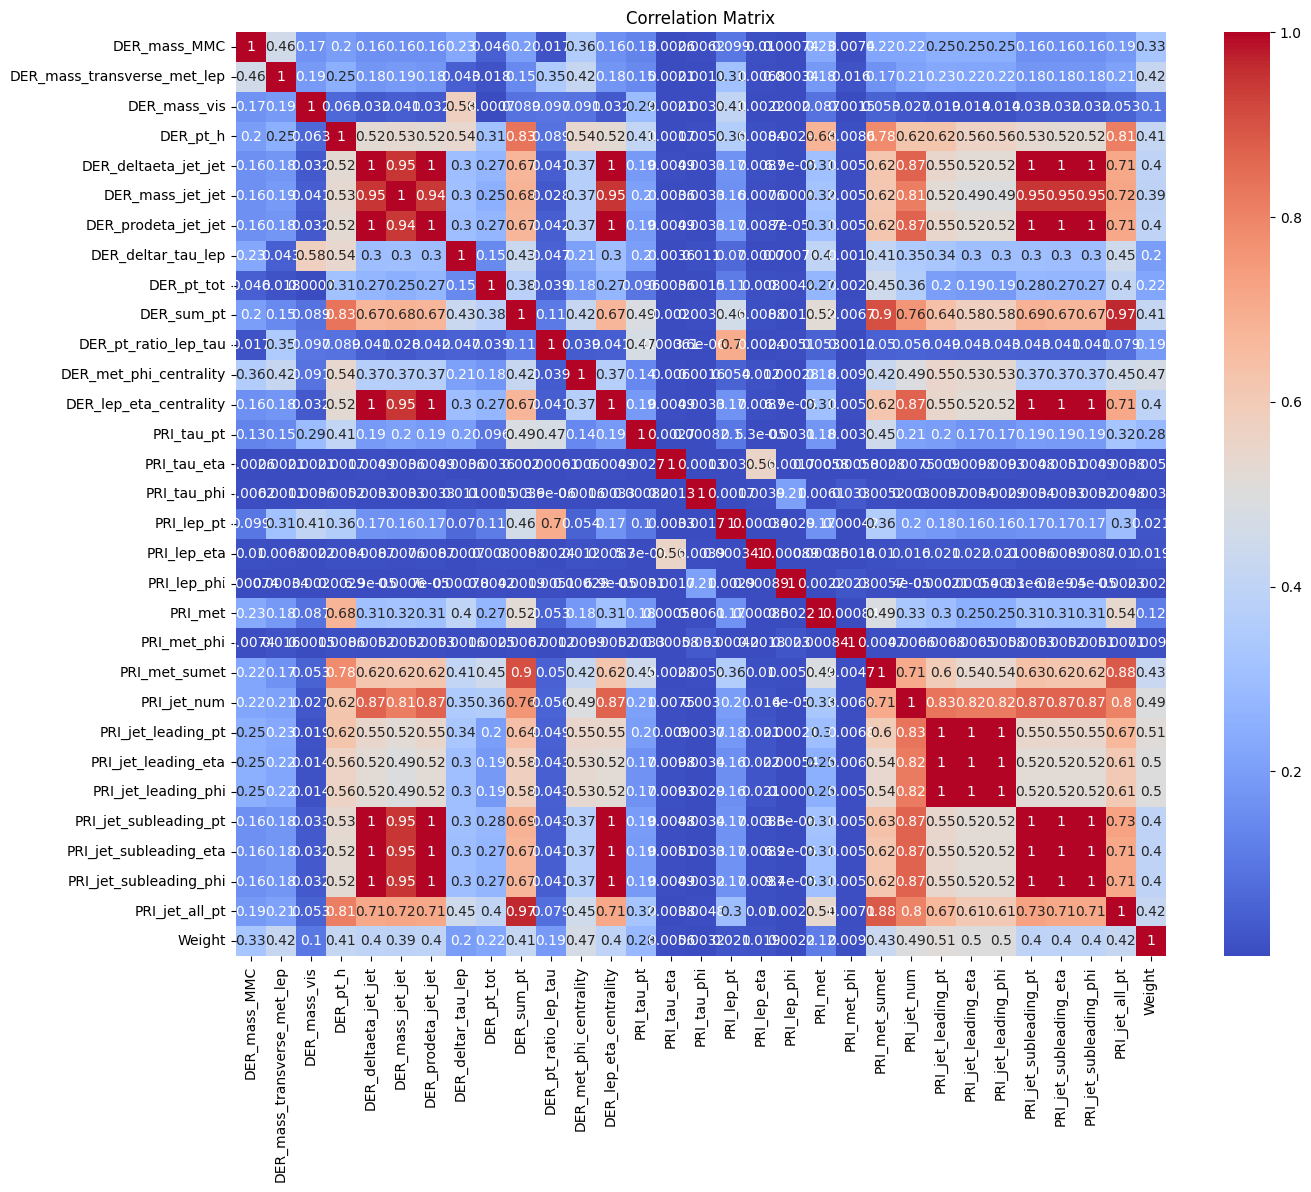

-----------------------------------------------
Multicollinear columns: {'DER_pt_h', 'DER_sum_pt', 'PRI_met_sumet', 'PRI_jet_subleading_pt', 'PRI_lep_pt', 'DER_pt_ratio_lep_tau', 'DER_lep_eta_centrality', 'PRI_jet_leading_eta', 'DER_mass_jet_jet', 'PRI_jet_leading_phi', 'DER_prodeta_jet_jet', 'PRI_jet_subleading_eta', 'PRI_jet_leading_pt', 'PRI_jet_num', 'DER_deltaeta_jet_jet', 'PRI_jet_all_pt', 'PRI_jet_subleading_phi'}


In [16]:
multicollinear_cols = check_multicollinearity(df)

print("-----------------------------------------------")

print("Multicollinear columns:", multicollinear_cols)

In [17]:
len(multicollinear_cols)

17

In [18]:
## Dropping the multicollinear columns

df.drop(multicollinear_cols, axis=1, inplace=True)

In [19]:
df.shape

(250000, 15)

In [20]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_deltar_tau_lep,DER_pt_tot,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,Weight,Label
0,138.470,51.655,97.827,3.064,41.928,1.396,32.638,1.017,0.381,2.273,-2.414,16.824,-0.277,0.002653,s
1,160.937,68.768,103.235,3.473,2.078,1.414,42.014,2.039,-3.011,0.501,0.103,44.704,-1.916,2.233584,b
2,-999.000,162.172,125.953,3.148,9.336,1.414,32.154,-0.705,-2.093,-0.953,1.052,54.283,-2.186,2.347389,b
3,143.905,81.417,80.943,3.310,0.414,-1.285,22.647,-1.655,0.010,-0.522,-3.100,31.082,0.060,5.446378,b
4,175.864,16.915,134.805,3.891,16.405,-1.385,28.209,-2.197,-2.231,0.798,1.569,2.723,-0.871,6.245333,b


In [21]:
## Mannually encoding the Label values

df['Label'] = df['Label'].replace({'b': 0, 's': 1})

In [22]:
X = df.drop(columns=["Label"], axis=1)
y = df["Label"]

In [23]:
y.value_counts()

Label
0    164333
1     85667
Name: count, dtype: int64

## Define Pipeline

In [24]:
## Define the pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler())
    ]
)

In [25]:
numerical_features = X.select_dtypes(exclude="object").columns 

numerical_features

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'Weight'],
      dtype='object')

In [26]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("RobustScaler", RobustScaler(), numerical_features)
], remainder="passthrough")

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train = transformer.fit_transform(X_train)

In [29]:
X_test = transformer.transform(X_test)

In [30]:
X_train.shape, X_test.shape

((200000, 14), (50000, 14))

In [31]:
X_train.shape[-1]

14

In [32]:
## Tensorflow imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [33]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[-1],), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [35]:
metrics = [
    keras.metrics.BinaryAccuracy(name="accuracy"),
    keras.metrics.AUC(name="auc", curve="ROC"),
    keras.metrics.Precision(name="precision")
]

# Compile the model 
model.compile(optimizer=keras.optimizers.Adam(0.01),
             loss="binary_crossentropy",
             metrics=metrics)

Epoch 1/10
5000/5000 [==============================] - 28s 4ms/step - loss: 0.1037 - accuracy: 0.9593 - auc: 0.9917 - precision: 0.9284 - val_loss: 0.0562 - val_accuracy: 0.9783 - val_auc: 0.9978 - val_precision: 0.9555
Epoch 2/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0601 - accuracy: 0.9780 - auc: 0.9968 - precision: 0.9612 - val_loss: 0.0732 - val_accuracy: 0.9772 - val_auc: 0.9966 - val_precision: 0.9388
Epoch 3/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0387 - accuracy: 0.9864 - auc: 0.9985 - precision: 0.9731 - val_loss: 0.0134 - val_accuracy: 0.9965 - val_auc: 0.9999 - val_precision: 0.9960
Epoch 4/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0334 - accuracy: 0.9882 - auc: 0.9988 - precision: 0.9779 - val_loss: 0.0426 - val_accuracy: 0.9875 - val_auc: 0.9977 - val_precision: 0.9711
Epoch 5/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0293 - accuracy: 0.9896 - auc: 0.9990

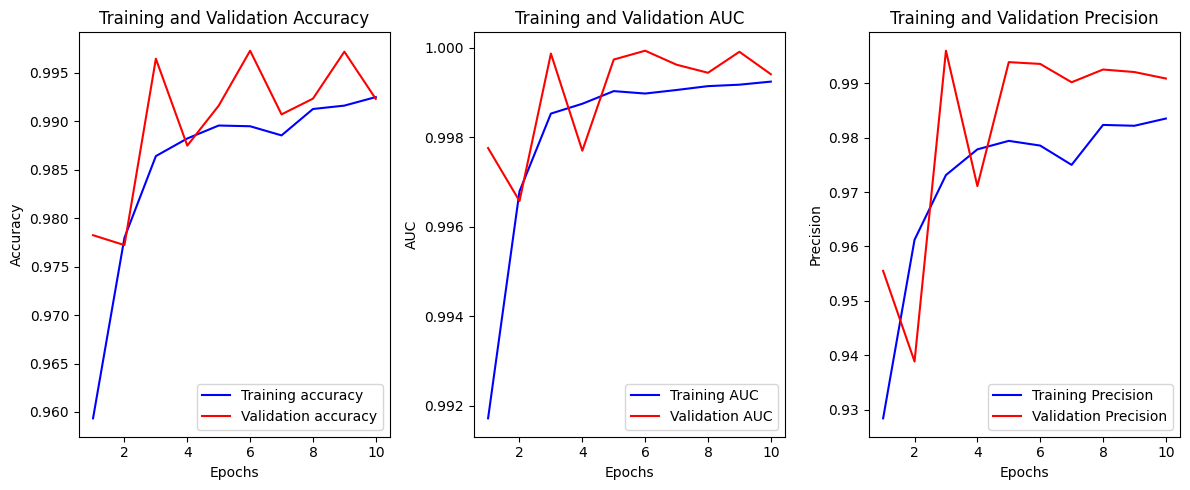

In [36]:
epochs = 10
batch_size = 128

# Train your model (replace X_train, y_train with your data)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Access the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
auc = history.history['auc']
val_auc = history.history['val_auc']
precision = history.history['precision']
val_precision = history.history['val_precision']


# Create plots for the metrics
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(131)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot AUC
plt.subplot(132)
plt.plot(epochs, auc, 'b', label='Training AUC')
plt.plot(epochs, val_auc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

# Plot precision
plt.subplot(133)
plt.plot(epochs, precision, 'b', label='Training Precision')
plt.plot(epochs, val_precision, 'r', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
import kerastuner as kt

In [38]:
def model_builder(hp):
  model = keras.Sequential()
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  metrics = [
    keras.metrics.BinaryAccuracy("accuracy"),
    keras.metrics.AUC(curve="roc"),
    keras.metrics.Precision(name="precision")]

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=metrics)

  return model

In [39]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=5)

In [40]:
# using early stopping to stop training the model when optimal value of recall and loss values are achieved.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_precision', patience=5)

In [41]:
tuner.search(X_train, y_train, epochs=10, validation_data = (X_test, y_test), callbacks=[stop_early], batch_size=128)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 5 Complete [00h 01m 23s]
val_loss: 0.005657503847032785

Best val_loss So Far: 0.005213954020291567
Total elapsed time: 00h 05m 24s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 448 and the optimal learning rate for the optimizer
is 0.001.



In [42]:
model = Sequential()
model.add(Dense(288, input_shape=(X_train.shape[-1],), activation='relu'))
model.add(Dense(288, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.compile(optimizer=keras.optimizers.Adam(0.01),
             loss='binary_crossentropy',
             metrics=metrics)

In [44]:
epochs = 10 
batch_size = 128 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 0.0961 - accuracy: 0.9679 - auc: 0.9944 - precision: 0.9412 - val_loss: 0.0531 - val_accuracy: 0.9795 - val_auc: 0.9978 - val_precision: 0.9537
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0460 - accuracy: 0.9831 - auc: 0.9980 - precision: 0.9687 - val_loss: 0.0695 - val_accuracy: 0.9733 - val_auc: 0.9984 - val_precision: 0.9278
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0290 - accuracy: 0.9898 - auc: 0.9990 - precision: 0.9817 - val_loss: 0.0229 - val_accuracy: 0.9915 - val_auc: 0.9996 - val_precision: 0.9835
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0216 - accuracy: 0.9924 - auc: 0.9994 - precision: 0.9863 - val_loss: 0.0163 - val_accuracy: 0.9944 - val_auc: 0.9995 - val_precision: 0.9872
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0227 - accuracy: 0.9922 - auc: 0.9993 - p

## Save the Model

In [45]:
model.save('hb_model.h5')